In [1]:
from recovar import RepresentationLearningSingleAutoencoder, RepresentationLearningDenoisingSingleAutoencoder, RepresentationLearningMultipleAutoencoder
from recovar import ClassifierAutocovariance, ClassifierAugmentedAutoencoder, ClassifierMultipleAutoencoder
from kfold_tester import KFoldTester
from evaluator import Evaluator, CropOffsetFilter
from sklearn.metrics import auc

2025-07-09 00:32:51.797288: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-09 00:32:51.815922: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-07-09 00:32:51.815943: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-07-09 00:32:51.815952: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-09 00:32:51.819548: I tensorflow/core/platform/cpu_feature_g

In [4]:
# Experiment name.
EXP_NAME = "exp_test"

# Should be RepresentationLearningSingleAutoencoder, RepresentationLearningDenoisingSingleAutoencoder or RepresentationLearningMultipleAutoencoder
REPRESENTATION_LEARNING_MODEL_CLASS = RepresentationLearningMultipleAutoencoder
CLASSIFIER_MODEL_CLASS = ClassifierMultipleAutoencoder

# Should be stead or instance.
TRAIN_DATASET = "instance"
TEST_DATASET = "instance"

# Number of epochs
EPOCHS = [9]

# Split.
SPLIT = 0

In [5]:
tester = KFoldTester(
    EXP_NAME,
    REPRESENTATION_LEARNING_MODEL_CLASS,
    CLASSIFIER_MODEL_CLASS,
    train_dataset=TRAIN_DATASET,
    test_dataset=TEST_DATASET,
    split=SPLIT,
    epochs=EPOCHS
)
tester.test()

/home/onur/Desktop/GitRepos/recovar/reproducibility/kfold_environment.py:442: DtypeWarning: Columns (23,24,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  eq_metadata = pd.read_csv(eq_metadata_csv)
2025-07-09 00:33:52.639458: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700


In [6]:
filters = [CropOffsetFilter()]
evaluator = Evaluator(exp_name = EXP_NAME, 
                      representation_learning_model_class=REPRESENTATION_LEARNING_MODEL_CLASS, 
                      classifier_model_class = CLASSIFIER_MODEL_CLASS, 
                      train_dataset = TRAIN_DATASET, 
                      test_dataset = TEST_DATASET, 
                      filters = filters, 
                      epochs = EPOCHS, 
                      split = SPLIT,
                      method_params={})

/home/onur/Desktop/GitRepos/recovar/reproducibility/kfold_environment.py:442: DtypeWarning: Columns (23,24,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  eq_metadata = pd.read_csv(eq_metadata_csv)


In [7]:
roc_vectors = evaluator.get_roc_vectors()
fpr = roc_vectors[0]["fpr"]
tpr = roc_vectors[0]["tpr"]
roc_auc = auc(roc_vectors[0]["fpr"], roc_vectors[0]["tpr"])
print(roc_auc)

0.9760344885221542


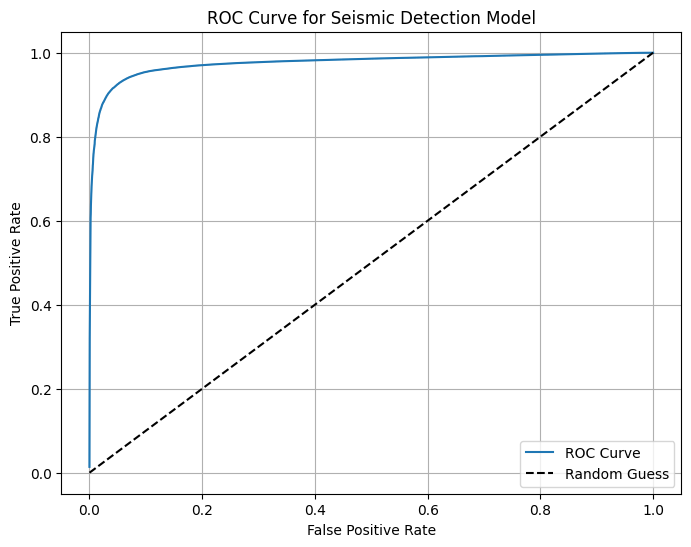

In [9]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame for Seaborn
roc_data = pd.DataFrame({
    'False Positive Rate': fpr,
    'True Positive Rate': tpr
})

plt.figure(figsize=(8, 6))
sns.lineplot(data=roc_data, x='False Positive Rate', y='True Positive Rate', label='ROC Curve')

# Plot random guess line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Seismic Detection Model')
plt.legend()
plt.grid(True)
plt.show()